**Reading in Spotify Data JSON Files**

In [10]:
import json

with open('/StreamingHistory0.json') as f:
    strm_hist = json.load(f)

with open('/StreamingHistory1.json') as f:
    strm_hist_2 = json.load(f)

Lets view the first track listed from each list of song data to see what type of data and features we are working with.

In [11]:
print(strm_hist[0])
print(strm_hist_2[0])

{'endTime': '2022-10-20 01:48', 'artistName': 'Avicii', 'trackName': 'Without You (feat. Sandro Cavazza)', 'msPlayed': 91502}
{'endTime': '2023-08-10 20:13', 'artistName': 'Avicii', 'trackName': 'The Days', 'msPlayed': 123180}


Lets use Pandas to examine our data.

In [12]:
import pandas as pd

df = pd.DataFrame(strm_hist)
df2 = pd.DataFrame(strm_hist_2)

df

,endTime,artistName,trackName,msPlayed
0,2022-10-20 01:48,Avicii,Without You (feat. Sandro Cavazza),91502
1,2022-10-20 01:51,Watchhouse,Old Ties and Companions,188946
2,2022-10-20 01:53,Kronan,Gatluak - Bakermat Remix,139383
3,2022-10-20 01:54,GHOSTT,Lovers Carvings,85368
4,2022-10-20 01:54,Bakermat,Baianá,1002
...,...,...,...,...
9995,2023-08-10 20:10,Pop Smoke,Invincible,116038
9996,2023-08-10 20:10,Augustine,Guts,0
9997,2023-08-10 20:10,Shag Rock,Sunbleached Girl,1250
9998,2023-08-10 20:10,Public Library Commute,Mile High,1230


In [13]:
#Lets merge our two streaming history dataframes together
merged_df = pd.concat([df, df2])
merged_df

,endTime,artistName,trackName,msPlayed
0,2022-10-20 01:48,Avicii,Without You (feat. Sandro Cavazza),91502
1,2022-10-20 01:51,Watchhouse,Old Ties and Companions,188946
2,2022-10-20 01:53,Kronan,Gatluak - Bakermat Remix,139383
3,2022-10-20 01:54,GHOSTT,Lovers Carvings,85368
4,2022-10-20 01:54,Bakermat,Baianá,1002
...,...,...,...,...
2281,2023-10-20 21:02,conswank,Wrong Choices,8201
2282,2023-10-20 21:06,Kygo,I'll Wait,215360
2283,2023-10-20 21:10,Calvin Harris,I Need Your Love (feat. Ellie Goulding),234506
2284,2023-10-20 21:14,Silk City,Electricity (with Dua Lipa),238173


In [14]:
from collections import Counter

What are my most frequently listened to artists and Songs?



We can use the Python Counter to get the counts of each respectively from our dataset.

In [18]:
#Creates a sorted list containing the frequency of occurences in a specified colname

def sorted_counter(dataframe, colname):

  counter = Counter(dataframe[colname])

  # Convert the Counter result to a dictionary

  counts = dict(counter)

  #Use lambda function to sort dict based on dict values (occurences)
  counts = sorted(counts.items(), key=lambda x:x[1], reverse = True)

  return counts


Lets Visualize my top 20 artists from the past few years

Text(0, 0.5, 'Song Plays')

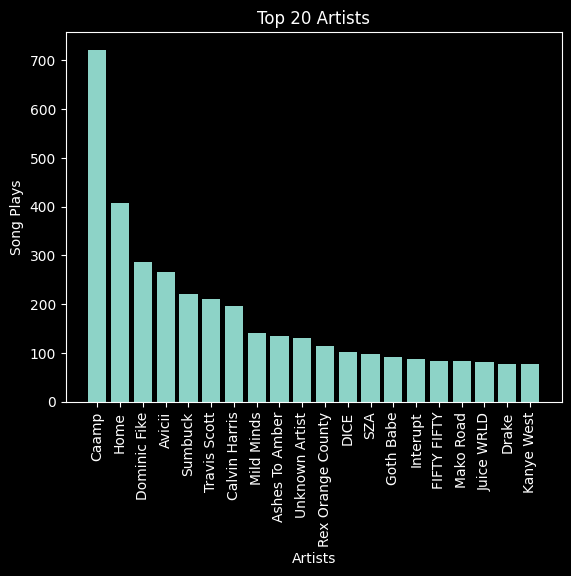

In [19]:
from matplotlib import pyplot as plt

counts = sorted_counter(merged_df, 'artistName')
top_ten_artists = counts[:20]

#List comprehension to seperate artist name and number of plays
plays = [x[1] for x in top_ten_artists]
artist_name = [x[0] for x in top_ten_artists]

# Plot bar chart of top artists
plt.style.use('dark_background')
plt.bar(artist_name, plays)
plt.title('Top 20 Artists')
plt.xticks(rotation=90)
plt.xlabel('Artists')
plt.ylabel('Song Plays')

Notice the "Unknown Artist" bar in our plot... it looks like we may need to do some data cleaning.


Before this, lets do the same and visualize my top songs from the past few years


Text(0, 0.5, 'Song Plays')

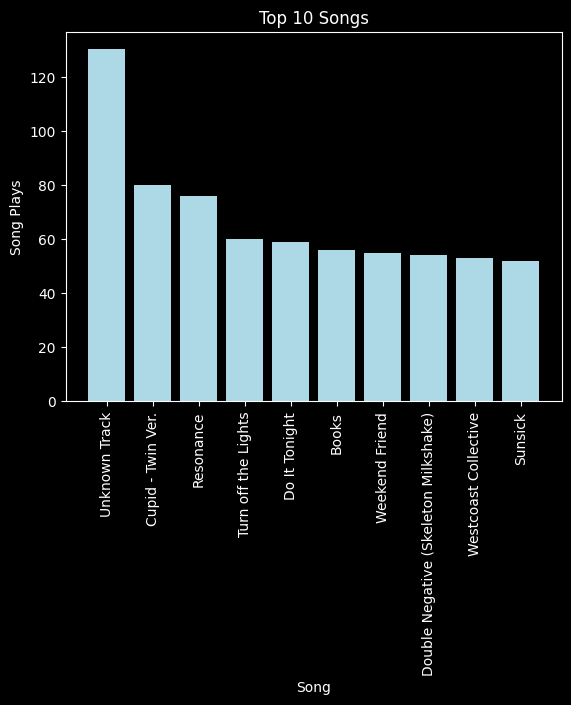

In [20]:
counts = sorted_counter(merged_df, 'trackName')
top_ten = counts[:10]


#List comprehension to seperate artist name and number of plays
song_plays = [x[1] for x in top_ten]
song_name = [x[0] for x in top_ten]

# Plot bar chart of top artists
plt.style.use('dark_background')
plt.bar(song_name, song_plays, color='lightblue')
plt.title('Top 10 Songs')
plt.xticks(rotation=90)
plt.xlabel('Song')
plt.ylabel('Song Plays')

As you might have noticed in both plots above there are "Unknown Artist and Unknown Songs. If we inspect the actual data, this is how is was delievered by spotfiy, so this is an issue on their end. Regardless we have to do a little work to get rid of it.

In [21]:
print(counts[0])

filtered_df = merged_df[merged_df['trackName'] == 'Unknown Track']

filtered_df

#We have no way of telling these are the same song, and can nonetheless assume they are different

#So lets filter these out as outliers and reconstruct the song plot above

cleaned_df = merged_df[merged_df['trackName'] != 'Unknown Track']


('Unknown Track', 130)


In [23]:
#Lets write a quick plotting function since we are plotting so much
def barplot_from_counter(dataframe, category, top_num, xlab, ylab, title):
  counts = sorted_counter(dataframe, category)
  top = counts[:top_num]


  #List comprehension to seperate artist name and number of plays
  x = [x[1] for x in top]
  y = [x[0] for x in top]

  # Plot bar chart of top artists
  plt.style.use('dark_background')
  plt.bar(y, x, color='pink')
  plt.title(title)
  plt.xticks(rotation=90)
  plt.xlabel(xlab)
  plt.ylabel(ylab)


Lets replot our Song data to see what our true Top-10 listens are.

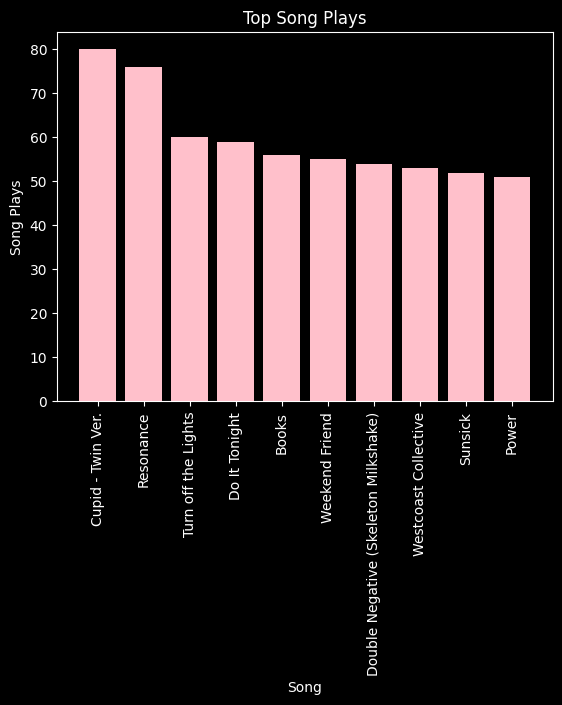

In [24]:
barplot_from_counter(cleaned_df, 'trackName', 10, 'Song', 'Song Plays', 'Top Song Plays')

We can take this analysis one step further. Lets try and use word embeddings to determine the lyrical similarity of songs that I listen to.

We can initialize the model use a list that contains a list of words (lyrics) for each song.

To get the lyrics for each song we can use the song title from our Spotify Data and Genius API to fetch the data we need.

In [1]:
#Doc2Vec works well for paragraph and document embeddings, which is more likened to the task of comparing whole sets of lyrics.

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [123]:
#Lets make unique list of all of my songs
song_list = set(cleaned_df['trackName'].tolist())
sl = list(song_list)
print(sl)

len(song_list)

['Lithuania (feat. Travis Scott)', 'Time Lost', 'Best Day Of My Life', 'Trap Queen', 'Bends', 'I Mean It (feat. Remo)', 'Rave Harder Techno Bass', 'Rich Flex', 'Mayhem', 'Wishing Well', 'Earned It (Fifty Shades Of Grey)', 'ALRIGHT', 'Shockwave (with Afrojack)', 'Banter', 'Lavender Haze', 'Jungle (Radio Edit)', 'Since You Been Gone', 'No Role Modelz', 'Conversations', 'Dollars (feat. Bryce Vine)', "I'll Wait", 'Good Looking', 'Gasolina', 'Blue - Flume Remix', 'Holidays', 'Somewhere a Judge', 'Nevermind (Wankelmut Remix)', 'Ep 27 / How to Lean Bulk ', 'Cali4nia', 'catfish', 'Power', 'makemesee', 'Wide Awake', 'Flowing Box Fan', 'K-POP (feat. Bad Bunny & The Weeknd)', 'Mask Off - Marshmello Remix', 'Backseat', 'The Jam', 'Payphone - Hardstyle', 'Down Like That (feat. Rick Ross, Lil Baby & S-X)', 'Hell Shell', 'My Kingdom', 'the leaf', 'Middle Of The Night - Hardstyle Remix', 'HUMID AIR', 'Suspended', 'Wes', 'Sos: Tribute to Avicii (Remix)', 'Best Love Song', 'Baby again..', 'Lake Missoula

3427

The lyricsgenius API (used below) gives us the data in a sloppy format, so we have to do some regex parsing to clean it.

In [72]:
import re

#Clean up the lyric text data from the lyricsgenius API
def clean_text(input_text):
    # Remove everything before "Lyrics," including "Lyrics" itself
    cleaned_text = re.sub(r'^.*Lyrics', '', input_text, flags=re.S)

    # Replace new line characters with spaces
    cleaned_text = re.sub(r'\n', ' ', cleaned_text)

    # Remove both single and double backslashes before apostrophes
    cleaned_text = re.sub(r'\\{1,2}\'', "'", cleaned_text)

    # Remove the "73Embed" tag at the end
    cleaned_text = re.sub(r'\d+embed$', '', cleaned_text)

    return cleaned_text

In [111]:
#Lets use a LyricsGenius which is a Python client for the Genius.com API
import lyricsgenius as lg

# Genius API access token
genius = lg.Genius("UqwPygzZSvSfnHf8LNf6kD3ntG_V84foHLKB-_fpl6Ga10yUQGFeVZZOIi9Yu5LS",
                   skip_non_songs=True,
                   #Maybe get rid of line below
                   remove_section_headers=True)

#This function extracts the lyrics from our lyricsgenius API request
def get_lyrics(song_list):
    songs = []
    for song_name in song_list:
        try:
            lyr = (genius.search_song(song_name)).lyrics
            #print(lyr)
            songs.append(TaggedDocument(words=clean_text(lyr).split(), tags=[song_name]))
        except:
            print(f"Exception at {song_name}")
    return songs

For each song in my listening data, lets scrape the lyrics using lyricsgenius and the Genius API for each song, and preprocess them into an input for a Doc2Vec model. We can use the Doc2Vec model to determine which songs are similar!

Per the Gensim documentation, their model allows us to learn paragraph embeddings (or in our case lyric embeddings) via the distributed memory and distributed bag of words models from Quoc Le and Tomas Mikolov: “Distributed Representations of Sentences and Documents”.

Le and Mikolov's paragraph vector model attempts to overcome two issues associated with Bag of Words models:
 1. BOW Models lose the ordering of the words.
 2. BOW Models ignore semantics of the words.

In [124]:
#Scrape lyrics for our list of songs
lyrics = get_lyrics(sl)

#Build Doc2Vec Model
model = Doc2Vec(vector_size=20, window=2, min_count=1, dm=1, epochs=100)
model.build_vocab(lyrics)
model.train(lyrics, total_examples=model.corpus_count, epochs=model.epochs)

#Function used to get the lyrics of a song without tagging (a preprocessing operation for training our Doc2Vec model)
#Use this when testing similarity after training
def get_lyrics_notag(song_list):
    songs = []
    for song_name in song_list:
        try:
            lyr = (genius.search_song(song_name)).lyrics
            #print(lyr)
            songs.append(clean_text(lyr).split())
        except:
            print(f"Exception at {song_name}")
    return songs


#Lets test the song "Antidote" by Travis Scott and try and find lyrically similar songs

#Fetch the lyrics
new_doc = get_lyrics_notag(["Antidote"])[0]
#Vectorize the lyrics
inferred_vector = model.infer_vector(new_doc)

# Calculate lyric similarity
similar_docs = model.dv.most_similar([inferred_vector])

print("Most similar documents to 'new_doc':")
for doc_id, similarity in similar_docs:
    print(f"Document: {doc_id}, Similarity: {similarity}")

from google.colab import drive
drive.mount('/content/drive')

Streaming output truncated to the last 5000 lines.
Searching for "Murder In My Mind"...
Done.
Searching for "Quand vous souriez"...
Done.
Searching for "Collide"...
Done.
Searching for "Moss"...
Done.
Searching for "Circo Loco"...
Done.
Most similar documents to 'new_doc':
Document: Antidote, Similarity: 0.9975103735923767
Document: For Y'all (feat. Jacquees), Similarity: 0.9397636651992798
Document: FourFiveSeconds, Similarity: 0.9248085618019104
Document: Thotiana, Similarity: 0.9198378920555115
Document: FE!N (feat. Playboi Carti), Similarity: 0.9121710658073425
Document: STARGAZING, Similarity: 0.9101888537406921
Document: wonderful, Similarity: 0.9045840501785278
Document: HIGHEST IN THE ROOM, Similarity: 0.9039766192436218
Document: If I'm Wrong, Similarity: 0.9038230776786804
Document: Blessings, Similarity: 0.8983703255653381
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


UsageError: unrecognized arguments: Drive/saved_session.ipynb


Lets try and examine the genre and aritst of these "similar" songs to see how well the Doc2Vec Model performs at the tast based on lyrical similarity. Of course "Antidote" is correctly the most similar, but we will exclude this from our analysis.

In [40]:
antidote_most_sim = ["For Y'all (feat. Jacquees)", "FourFiveSeconds", "Thotiana","FE!N (feat. Playboi Carti)","STARGAZING", "wonderful", "HIGHEST IN THE ROOM", "If I'm Wrong", "Blessings"]

In [41]:
#Lets get the artists of the corresponding songs so we can analyze the genre they typically make music in.
unique_tracks = cleaned_df.drop_duplicates(subset=['artistName', 'trackName'])
filtered_artists = unique_tracks.loc[unique_tracks['trackName'].isin(antidote_most_sim), ['artistName', 'trackName']]


filtered_artists


,artistName,trackName
1010,Travis Scott,HIGHEST IN THE ROOM
1016,Blueface,Thotiana
1030,Young Thug,For Y'all (feat. Jacquees)
1049,Travis Scott,wonderful
2327,Home,If I'm Wrong
6025,Rihanna,FourFiveSeconds
9543,Big Sean,Blessings
9821,Travis Scott,FE!N (feat. Playboi Carti)
646,Travis Scott,STARGAZING


In [44]:
set(filtered_artists['artistName'])

{'Big Sean', 'Blueface', 'Home', 'Rihanna', 'Travis Scott', 'Young Thug'}

Almost all of these artists/songs are Hip-Hop artists/songs, just like our song used for the similarity search ("Antidote" by Travis Scott). "If I'm Wrong" by Home is a bit of an outlier so lets do some investigating to see if there are multiple songs titles "If I'm Wrong" in my listening History, in case we are reffering to the wrong one.


In [42]:
search_query = "If I'm wrong"
similar_songs = cleaned_df[cleaned_df['trackName'].str.contains(search_query, case=False, na=False)]
similar_songs

,endTime,artistName,trackName,msPlayed
2327,2022-12-30 15:06,Home,If I'm Wrong,175123
6430,2023-06-06 19:51,Home,If I'm Wrong,175123
6913,2023-06-20 22:12,Home,If I'm Wrong,175123
9121,2023-07-26 04:05,Home,If I'm Wrong,4040
9128,2023-07-26 17:08,Home,If I'm Wrong,346394
9407,2023-08-03 11:19,Home,If I'm Wrong,175123
9684,2023-08-06 15:45,Home,If I'm Wrong,175123
592,2023-08-20 19:34,Home,If I'm Wrong,175123
1109,2023-09-03 18:40,Home,If I'm Wrong,175123
1151,2023-09-04 18:07,Home,If I'm Wrong,175123


It looks like this is the only song with a similar name.

If we wanted to make this a song reccomender, we would simply need a corpus of songs, and to use more computing to do so. For example, we could scrape genius for all song lyrics they have on their website, and then retrain the Doc2Vec model with the larger dataset. Effectively, given any song, our model would now be able to identify new songs as most similar, even if they are not in my personal listening history.

Of course lyrically similarity is not the only aspect that should be incorporated into a song recommendation system, but this is one example of how we can utilize some simple word embedding models and still get a successful and powerful outcome.

Other aspects important to song recommendation might be:

*   Number of plays
*   Collaborative Filtering methods (reactions of users w similar taste)
* Release Year
* Diversity



*by Ian Stebbins*